# SemEval 2024 task ECAC - EDA

## Load data

In [3]:
import json
import matplotlib.pyplot as plt
plt.style.use('ggplot')

### Utterances JSON

In [4]:
with open('data/Subtask_2_train.json') as f:
    text_data = json.load(f)

# text_data = sorted(text_data, key=lambda x: x['conversation_ID'])
text_data[0]

{'conversation_ID': 1,
 'conversation': [{'utterance_ID': 1,
   'text': 'Alright , so I am back in high school , I am standing in the middle of the cafeteria , and I realize I am totally naked .',
   'speaker': 'Chandler',
   'emotion': 'neutral',
   'video_name': 'dia1utt1.mp4'},
  {'utterance_ID': 2,
   'text': 'Oh , yeah . Had that dream .',
   'speaker': 'All',
   'emotion': 'neutral',
   'video_name': 'dia1utt2.mp4'},
  {'utterance_ID': 3,
   'text': 'Then I look down , and I realize there is a phone ... there .',
   'speaker': 'Chandler',
   'emotion': 'surprise',
   'video_name': 'dia1utt3.mp4'},
  {'utterance_ID': 4,
   'text': 'Instead of ... ?',
   'speaker': 'Joey',
   'emotion': 'surprise',
   'video_name': 'dia1utt4.mp4'},
  {'utterance_ID': 5,
   'text': 'That is right .',
   'speaker': 'Chandler',
   'emotion': 'anger',
   'video_name': 'dia1utt5.mp4'},
  {'utterance_ID': 6,
   'text': 'Never had that dream .',
   'speaker': 'Joey',
   'emotion': 'neutral',
   'video_nam

### Load video and display it

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os



def vid_path(filename):
    return f'.\\data\\video\\train_all\\{filename}'

def load_video(filename):
    cap = cv2.VideoCapture(filename)
    frames = []
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        frames.append(frame)
    cap.release()
    return np.array(frames)

# print(len(os.listdir('./data/video/train/')))
print(len(os.listdir('.\\data\\video\\train_all\\')))


.\data\video\train_all\dia1utt8.mp4
All of a sudden , the phone starts to ring .


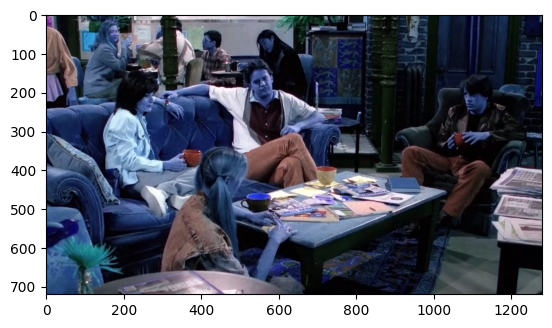

In [68]:
vid_no, utt_no = 1, 8

for conv in text_data:
    if conv['conversation_ID'] == vid_no:    
        for utt in conv['conversation']:
            if utt['utterance_ID'] == utt_no:
                print(vid_path(utt['video_name']))
                vid = load_video(vid_path(utt['video_name']))
                break

print(utt['text'])
plt.imshow(vid[0])
# plt.imshow(vid[len(vid)//2])
# plt.imshow(vid[-1])

In [24]:
vid[0].shape

(720, 1280, 3)

## Analyze utterances file

In [71]:
print("Ilość konwersacji", len(text_data))

utt_counts = []
emotions = []
characters_in_convs = []
for i in range(len(text_data)):
    conv = text_data[i]['conversation']

    utt_counts.append(len(conv))

    characters = set()
    for j in range(len(conv)):
        emotions.append(conv[j]['emotion'])
        characters.add(conv[j]['speaker'])
    characters_in_convs.append(characters)

print("Conversation Fragments:")
print("  Count: ", sum(utt_counts))
print("  Average: ", sum(utt_counts)/len(utt_counts))
print("  Median: ", sorted(utt_counts)[len(utt_counts)//2])
print("  Max: ", max(utt_counts))
print("  Min: ", min(utt_counts))

print("Emotions:")
print({x:emotions.count(x) for x in set(emotions)})

print("Characters:")
character_counts = [len(x) for x in characters_in_convs]
print("  Average: ", sum(character_counts)/len(character_counts))
print("  Min: ", min(character_counts))
print("  Max: ", max(character_counts))
print("  Number of conversations with 1 character: ", character_counts.count(1))
print("  Number of conversations with 9 characters: ", character_counts.count(9))

Ilość konwersacji 1374
Fragmenty konwersacji:
  Ilość:  13619
  Średnia:  9.91193595342067
  Mediana:  9
  Max:  33
  Min:  1
Emocje:
{'neutral': 5929, 'anger': 1615, 'joy': 2301, 'surprise': 1840, 'sadness': 1147, 'disgust': 414, 'fear': 373}
Postacie:
  Średnia:  2.7852983988355167
  Min:  1
  Max:  9
  Ilość konwersacji z 1 postacią:  78
  Ilość konwersacji z 9 postaciami:  1


(array([ 78., 640., 363., 163.,  74.,  39.,  13.,   3.,   1.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 9 artists>)

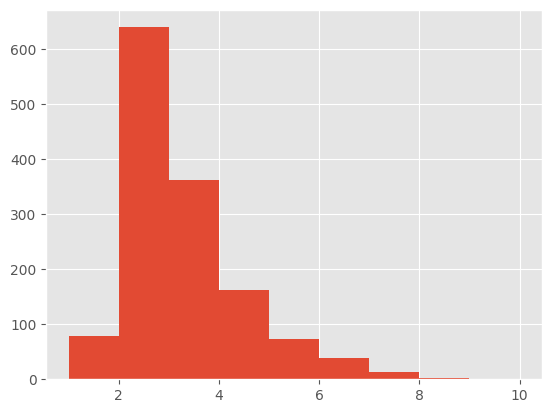

In [75]:
plt.hist(character_counts, bins=range(1, 11))

In [6]:
print("  Postacie w konwersacjach (min, max):")
characters_in_convs.sort(key=len, reverse=True)
print(characters_in_convs[0])
print(characters_in_convs[-1])

  Postacie w konwersacjach (min, max):
{'Joey', 'Monica', 'Rachel', 'Phoebe', 'Mr. Geller', 'Chandler', 'Mrs. Geller', 'Ross', 'All'}
{'Ross'}


In [44]:
emotions = ['sadness', 'anger', 'neutral', 'surprise', 'disgust', 'fear', 'joy']
# utt_word_lens, utt_char_lens = dict([e: [] for e in emotions]), dict([e: [] for e in emotions])
utt_word_lens, utt_char_lens = {e: [] for e in emotions}, {e: [] for e in emotions}

for i in range(len(text_data)):
    conv = text_data[i]['conversation']

    for j in range(len(conv)):
        e = conv[j]['emotion']
        
        utt_word_lens[e].append(len(conv[j]['text'].split()))
        # append a list of char lens for each word
        utt_char_lens[e].extend([len(w) for w in conv[j]['text'].split()])

    characters_in_convs.append(characters)

emotion_stats = {e: {
                    'word': {'avg': sum(utt_word_lens[e])/len(utt_word_lens[e]),
                             'max': max(utt_word_lens[e]), 
                             'min': min(utt_word_lens[e])},
                    'char': {'avg': sum(utt_char_lens[e])/len(utt_char_lens[e]),
                             'max': max(utt_char_lens[e]),
                             'min': min(utt_char_lens[e])}} 
                for e in emotions}

print("Statystyki długości wypowiedzi:")
for e, stat in emotion_stats.items():
    print("\n")
    print(e)
    print("number of words: ", stat['word'])
    print("length of words: ",stat['char'])

Statystyki długości wypowiedzi:


sadness
number of words:  {'avg': 13.833478639930252, 'max': 54, 'min': 1}
length of words:  {'avg': 3.0821201235268165, 'max': 14, 'min': 1}


anger
number of words:  {'avg': 13.06749226006192, 'max': 60, 'min': 1}
length of words:  {'avg': 3.1383150113722516, 'max': 14, 'min': 1}


neutral
number of words:  {'avg': 10.8105920053972, 'max': 62, 'min': 1}
length of words:  {'avg': 3.1650805042436345, 'max': 17, 'min': 1}


surprise
number of words:  {'avg': 8.884239130434782, 'max': 39, 'min': 1}
length of words:  {'avg': 3.0126628739218204, 'max': 25, 'min': 1}


disgust
number of words:  {'avg': 13.698067632850242, 'max': 48, 'min': 2}
length of words:  {'avg': 3.1927349673778873, 'max': 13, 'min': 1}


fear
number of words:  {'avg': 13.136729222520108, 'max': 44, 'min': 1}
length of words:  {'avg': 2.9010204081632653, 'max': 16, 'min': 1}


joy
number of words:  {'avg': 10.93263798348544, 'max': 78, 'min': 1}
length of words:  {'avg': 3.075608204802

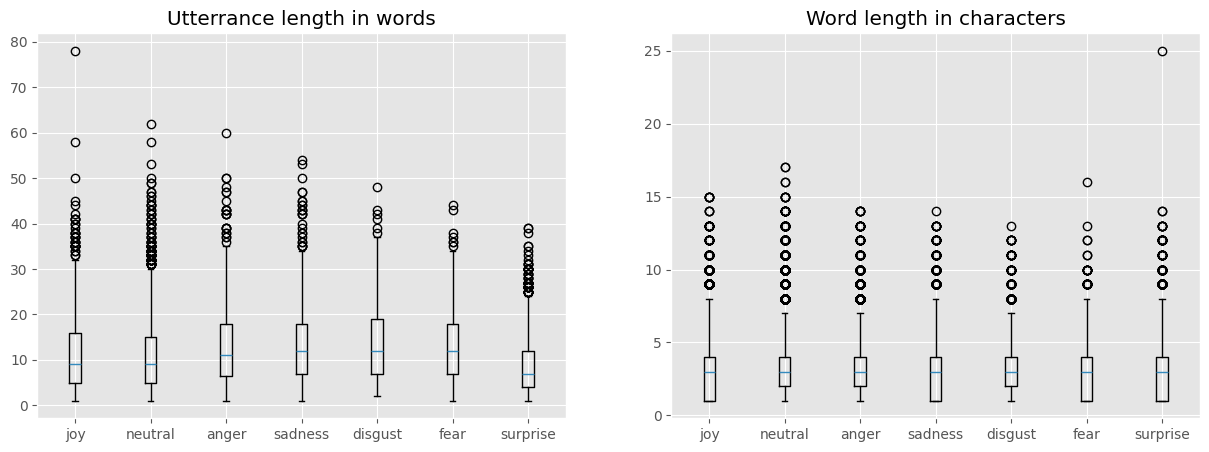

In [51]:
emotion_stats_items = emotion_stats.items()
# sort emotions decresing from the longest max utterance length in words
emotion_stats_items = sorted(emotion_stats_items, key=lambda x: x[1]['word']['max'], reverse=True)

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].set_title('Utterrance length in words')
axs[1].set_title('Word length in characters')

for i, (e, stat) in enumerate(emotion_stats_items):
    # axs[0].violinplot(utt_word_lens[e], positions=[i], showmedians=True)
    # axs[1].violinplot(utt_char_lens[e], positions=[i], showmedians=True)

    axs[0].boxplot(utt_word_lens[e], positions=[i])
    axs[1].boxplot(utt_char_lens[e], positions=[i])

    axs[0].set_xticks(range(len(emotions)))
    axs[0].set_xticklabels(emotions)
    axs[1].set_xticks(range(len(emotions)))
    axs[1].set_xticklabels(emotions)

plt.show()

In [6]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AlexTerentowicz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
from nltk.corpus import stopwords
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

emotions = ['sadness', 'anger', 'neutral', 'surprise', 'disgust', 'fear', 'joy']
docs = ['' for _ in range(len(emotions))]

for i in range(len(text_data)):
    conv = text_data[i]['conversation']
    for j in range(len(conv)):
        e = conv[j]['emotion']
        docs[emotions.index(e)] += conv[j]['text'] + ' '

vectorizer = TfidfVectorizer(stop_words=stopwords.words('english'), sublinear_tf=True)
tfidf_matrix = vectorizer.fit_transform(docs)

idf_values = vectorizer.idf_
amplified_idf = np.power(idf_values, 3)
tfidf_matrix = tfidf_matrix.multiply(amplified_idf).tocsr()

feature_names = vectorizer.get_feature_names_out()

top_n = 10
for i, emotion in enumerate(emotions):
    print(f"\nTop {top_n} words for '{emotion}':")
    tfidf_scores = tfidf_matrix[i].toarray()[0]
    top_indices = np.argsort(tfidf_scores)[-top_n:]
    top_words = [f"{feature_names[idx]}: {tfidf_scores[idx]:.4f}" for idx in reversed(top_indices)]
    # top_words = [f"{feature_names[idx]}" for idx in reversed(top_indices)]
    print(top_words)


Top 10 words for 'sadness':
['complicated: 0.7288', '28: 0.5880', 'lens: 0.5880', 'unfortunate: 0.5880', 'bored: 0.5880', 'police: 0.5880', 'buried: 0.5880', 'failed: 0.5880', 'depressing: 0.5880', 'chris: 0.5880']

Top 10 words for 'anger':
['dammit: 0.6726', 'suggestion: 0.6726', 'cramp: 0.5915', 'bapstein: 0.5915', 'blame: 0.5915', 'oboe: 0.5915', 'iceberg: 0.4772', 'rapist: 0.4772', 'react: 0.4772', 'disturbing: 0.4772']

Top 10 words for 'neutral':
['la: 0.4897', 'actual: 0.4685', 'molly: 0.4440', 'boutros: 0.4440', 'robert: 0.4440', 'smelly: 0.4150', 'de: 0.4150', 'breathe: 0.4150', 'push: 0.4150', 'present: 0.3795']

Top 10 words for 'surprise':
['goodacre: 0.8381', 'oww: 0.7371', 'trapped: 0.5947', 'yikes: 0.5947', 'barley: 0.5947', 'deli: 0.5947', 'err: 0.5947', '717: 0.5947', 'actress: 0.5947', 'wha: 0.3979']

Top 10 words for 'disgust':
['eww: 1.0500', 'ewww: 1.0500', 'strangers: 0.8472', 'woowoo: 0.8472', 'hairy: 0.8472', 'capable: 0.8472', 'blah: 0.8472', 'awfully: 0.8472

In [24]:
# analyze which punctuation is most often for which emotion

import string

# punctors = [c for c in string.punctuation]
# # remove [',' '"']
# punctors.remove(',')
# punctors.remove('"')

punctors = ['.', '!', '?']

punctors_counts = {e: {p: 0 for p in punctors} for e in emotions}

for i in range(len(text_data)):
    conv = text_data[i]['conversation']
    for j in range(len(conv)):
        e = conv[j]['emotion']
        text = conv[j]['text']
        for p in punctors:
            punctors_counts[e][p] += text.count(p)

# show top 5 and its counts

for e in emotions:
    print(f"\nPunctuation marks counts for '{e}':")
    top_punctors = sorted(punctors_counts[e].items(), key=lambda x: x[1], reverse=True)[:10]
    print([(p, count) for p, count in top_punctors])


Punctuation marks counts for 'sadness':
[('.', 1911), ('!', 295), ('?', 190)]

Punctuation marks counts for 'anger':
[('!', 1657), ('.', 1334), ('?', 472)]

Punctuation marks counts for 'neutral':
[('.', 7944), ('?', 1524), ('!', 551)]

Punctuation marks counts for 'surprise':
[('.', 1445), ('!', 1354), ('?', 1313)]

Punctuation marks counts for 'disgust':
[('.', 498), ('!', 216), ('?', 102)]

Punctuation marks counts for 'fear':
[('.', 823), ('!', 269), ('?', 119)]

Punctuation marks counts for 'joy':
[('.', 2631), ('!', 1752), ('?', 356)]


In [27]:
import cv2
# min max avg video length analysis

video_lengths = []
fps = []
seconds = []

for i_c, conv in enumerate(text_data):
    # print every 100 conversations
    if i_c % 100 == 0:
        print(f"Processing conversation {i_c}/{len(text_data)}")
    for utt in conv['conversation']:
        vid = load_video(vid_path(utt['video_name']))
        video_lengths.append(len(vid))
        fps.append(cv2.VideoCapture(vid_path(utt['video_name'])).get(cv2.CAP_PROP_FPS))
        seconds.append(len(vid)/cv2.VideoCapture(vid_path(utt['video_name'])).get(cv2.CAP_PROP_FPS))

print("Video lengths in frames: ")
print("  Min: ", min(video_lengths))
print("  Max: ", max(video_lengths))
print("  Avg: ", sum(video_lengths)/len(video_lengths))

print("Frames per second: ")
print("  Min: ", min(fps))
print("  Max: ", max(fps))
print("  Avg: ", sum(fps)/len(fps))

print("Video lengths in seconds: ")
print("  Min: ", min(seconds))
print("  Max: ", max(seconds))
print("  Avg: ", sum(seconds)/len(seconds))

Processing conversation 0/1374
Processing conversation 100/1374
Processing conversation 200/1374
Processing conversation 300/1374
Processing conversation 400/1374
Processing conversation 500/1374
Processing conversation 600/1374
Processing conversation 700/1374
Processing conversation 800/1374
Processing conversation 900/1374
Processing conversation 1000/1374
Processing conversation 1100/1374
Processing conversation 1200/1374
Processing conversation 1300/1374
Video lengths in frames: 
  Min:  2
  Max:  984
  Avg:  76.24135399074822
Frames per second: 
  Min:  23.80704845814978
  Max:  25.0
  Avg:  23.97824731210334
Video lengths in seconds: 
  Min:  0.08399999999999999
  Max:  41.0409681358943
  Avg:  3.1795059781754578


In [62]:
# find video name where the video is the shortest in frames
min_len = min(video_lengths)
min_len_idx = video_lengths.index(min_len)
min_len_idx

2348

In [64]:
# find video name where the video is the shortest in seconds

# iterate over all utterances to find min_len_idx
i = 0
for i_c, conv in enumerate(text_data):
    for utt in conv['conversation']:
        i += 1
        if i == min_len_idx:
            print(f"Found min_len_idx: {min_len_idx}, video name: {utt['video_name']}")
        


Found min_len_idx: 2348, video name: dia318utt5.mp4


.\data\video\train_all\dia14utt9.mp4
Big deal !
Chandler
anger


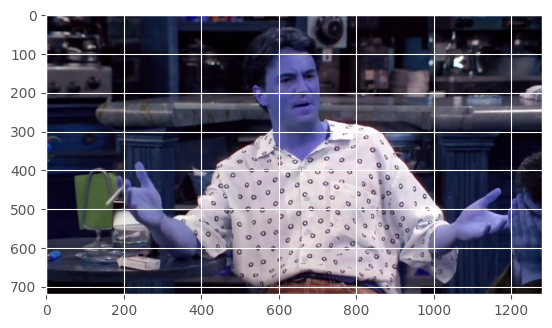

: 

In [42]:
# vid_no, utt_no = 318, 5 # shortest video
# vid_no, utt_no = 7, 1 # example of bad framing
# vid_no, utt_no = 25, 10 # example of good 4 comic framing
# vid_no, utt_no = 28, 2
vid_no, utt_no = 14, 9 # example of good framing for all types

for conv in text_data:
    if conv['conversation_ID'] == vid_no:    
        for utt in conv['conversation']:
            if utt['utterance_ID'] == utt_no:
                print(vid_path(utt['video_name']))
                vid = load_video(vid_path(utt['video_name']))
                break

print(utt['text'])
print(utt['speaker'])
print(utt['emotion'])
plt.imshow(vid[0])
# plt.imshow(vid[len(vid)//2])
# plt.imshow(vid[-1])